In [3]:
# import packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import girvan_newman, modularity
from pprint import pprint as pp


In [13]:
# load in the data
path = os.getcwd()
df = pd.read_csv(path+'/data/data_example.csv')
df = df.drop(df.columns[0], axis=1)
df.head(5)


,block_timestamp,from_address,to_address,value,from_address_type,to_address_type
0,2021-09-24 01:01:04 UTC,0x1c26d94a07b820b759581792a2eaff2fde3d250f,0x018d5c4783f5317815f6e8168942a12adde3cd3c,0.000000,EOA,Contract
1,2021-09-24 03:38:42 UTC,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0x893e228cecb7a39645ab9ab2966b71e7d8d94cef,0.067538,EOA,EOA
2,2021-09-24 04:37:14 UTC,0x14631c27771e7021fe4093a67b9a90353d64e951,0x07a13eea351d501cfedf96bda8528bbc71ca5d80,0.050000,EOA,Contract
3,2021-09-24 06:34:41 UTC,0xd5a06ac60905636f8c66f8ea1c662a1bfa2af9d1,0x0ee0cb563a52ae1170ac34fbb94c50e89adde4bd,0.000000,EOA,Contract
4,2021-09-24 09:23:45 UTC,0x6e551048cb8f6f94632206a25628807d76432126,0x0000000089341e263b85d84a0eea39f47c37a9d2,0.000000,EOA,Contract


In [14]:
userSpace = df[(df.from_address_type == 'EOA') & (df.to_address_type == 'EOA')]
contractSpace = df[(df.from_address_type == 'Contract')
                   & (df.to_address_type == 'Contract')]
bipartiteSpace = df[((df.from_address_type == 'EOA') & (df.to_address_type == 'Contract')) | (
    (df.from_address_type == 'Contract') & (df.to_address_type == 'EOA'))]


In [15]:
userSpace = userSpace[['from_address', 'to_address', 'value']]
userSpace.head()

,from_address,to_address,value
1,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0x893e228cecb7a39645ab9ab2966b71e7d8d94cef,0.067538
5,0x50e7b0f8b2811a7877191c3d2be56bc191772601,0x8951f25adcc7c3256dd9b521ed726fb587a46d52,0.048131
7,0x8fa6521bd55c981b27cc7dae33754dee86125e0a,0x510e8fdfdfe54907065ab4478d1ddb8495e42ec2,0.013084
16,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0x6139fbb2f9ff42eee1dd32c690eca07fe07644b5,0.025541
23,0x99f743d9e1db6bd9ac6cb27e4ae2d40cfe6de1cb,0x4f6742badb049791cd9a37ea913f2bac38d01279,2.044882


In [16]:
G = nx.from_pandas_edgelist(userSpace,                # the df containing the data
                          source='from_address',        # first element of the dyad
                          target='to_address',        # second element of the dyad
                          edge_attr='value')


In [17]:
G?

Type:           Graph
String form:    Graph with 52 nodes and 38 edges
Length:         52
File:           ~/opt/anaconda3/lib/python3.7/site-packages/networkx/classes/graph.py
Docstring:     
Base class for undirected graphs.

A Graph stores nodes and edges with optional data, or attributes.

Graphs hold undirected edges.  Self loops are allowed but multiple
(parallel) edges are not.

Nodes can be arbitrary (hashable) Python objects with optional
key/value attributes, except that `None` is not allowed as a node.

Edges are represented as links between nodes with optional
key/value attributes.

Parameters
----------
incoming_graph_data : input graph (optional, default: None)
    Data to initialize graph. If None (default) an empty
    graph is created.  The data can be any format that is supported
    by the to_networkx_graph() function, currently including edge list,
    dict of dicts, dict of lists, NetworkX graph, NumPy matrix
    or 2d ndarray, SciPy sparse matrix, or PyGraphviz gra

In [18]:
# inspect the network
pp(nx.info(G))


'Graph with 52 nodes and 38 edges'


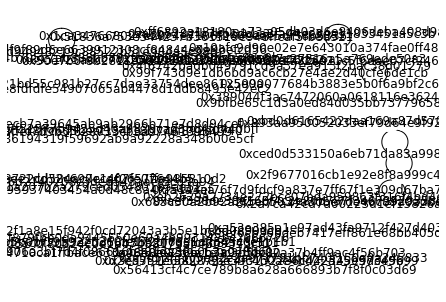

In [19]:
# draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, alpha=1, node_color='white')
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()


Betweenness Centrality - quantifies the number of times a node acts as a bridge along the shortest path between two other nodes

In [27]:
# fit
solutions = girvan_newman(G)

# node to community affiliations
tuple(sorted(c) for c in next(solutions))

# alternative paritioning solutions to consider
k = 10

# register modularit scores
modularity_scores = dict()

# iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)
    score = modularity(G, solution)
    modularity_scores[len(solution)] = score


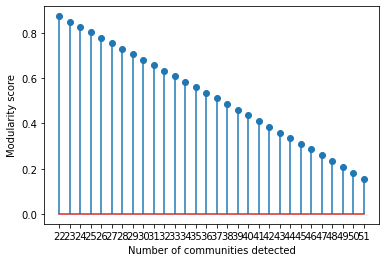

In [28]:
# plot modularity data
fig = plt.figure()
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()


In [33]:
DG = nx.DiGraph(G)


In [34]:
node_dc = nx.degree_centrality(G)


In [35]:
nx.set_node_attributes(G, node_dc, 'G')


In [36]:
G1 = nx.MultiGraph(G)


In [39]:
bet_centrality = nx.betweenness_centrality(G)

print(bet_centrality)

{'0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740': 0.004705882352941176, '0x893e228cecb7a39645ab9ab2966b71e7d8d94cef': 0.0, '0x50e7b0f8b2811a7877191c3d2be56bc191772601': 0.0, '0x8951f25adcc7c3256dd9b521ed726fb587a46d52': 0.0, '0x8fa6521bd55c981b27cc7dae33754dee86125e0a': 0.0, '0x510e8fdfdfe54907065ab4478d1ddb8495e42ec2': 0.0, '0xc098b2a3aa256d2140208c3de6543aaef5cd3a94': 0.004705882352941176, '0x6139fbb2f9ff42eee1dd32c690eca07fe07644b5': 0.0, '0x99f743d9e1db6bd9ac6cb27e4ae2d40cfe6de1cb': 0.0, '0x4f6742badb049791cd9a37ea913f2bac38d01279': 0.002352941176470588, '0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511': 0.011764705882352941, '0x3e4710ca1ffbace633e4850e02b9a1e0c3b5bf80': 0.0, '0xdd9a2d9e8ffef7d9b5f628733cb3a9746139b499': 0.0, '0xf7be8d31541a95937403454a0d48c8a4f5a4a3aa': 0.0, '0xba1321567780524c0e1a47488179ab4609573cf0': 0.0, '0xeb2629a2734e272bcc07bda959863f316f4bd4cf': 0.002352941176470588, '0x685c30a2b92a2f5eb5034a30be7de46c89a0adbe': 0.0, '0x3cd751e6b0078be393132286c442345e5dc49699': 0

In [42]:
bet_centrality = nx.betweenness_centrality(G, normalized=True,
                                           endpoints=False)
print(bet_centrality)


{'0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740': 0.004705882352941176, '0x893e228cecb7a39645ab9ab2966b71e7d8d94cef': 0.0, '0x50e7b0f8b2811a7877191c3d2be56bc191772601': 0.0, '0x8951f25adcc7c3256dd9b521ed726fb587a46d52': 0.0, '0x8fa6521bd55c981b27cc7dae33754dee86125e0a': 0.0, '0x510e8fdfdfe54907065ab4478d1ddb8495e42ec2': 0.0, '0xc098b2a3aa256d2140208c3de6543aaef5cd3a94': 0.004705882352941176, '0x6139fbb2f9ff42eee1dd32c690eca07fe07644b5': 0.0, '0x99f743d9e1db6bd9ac6cb27e4ae2d40cfe6de1cb': 0.0, '0x4f6742badb049791cd9a37ea913f2bac38d01279': 0.002352941176470588, '0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511': 0.011764705882352941, '0x3e4710ca1ffbace633e4850e02b9a1e0c3b5bf80': 0.0, '0xdd9a2d9e8ffef7d9b5f628733cb3a9746139b499': 0.0, '0xf7be8d31541a95937403454a0d48c8a4f5a4a3aa': 0.0, '0xba1321567780524c0e1a47488179ab4609573cf0': 0.0, '0xeb2629a2734e272bcc07bda959863f316f4bd4cf': 0.002352941176470588, '0x685c30a2b92a2f5eb5034a30be7de46c89a0adbe': 0.0, '0x3cd751e6b0078be393132286c442345e5dc49699': 0

Degree Centrality - The nodes with higher degree is more central

In [37]:
deg_centrality = nx.degree_centrality(G)

print(deg_centrality)

{'0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740': 0.0784313725490196, '0x893e228cecb7a39645ab9ab2966b71e7d8d94cef': 0.0196078431372549, '0x50e7b0f8b2811a7877191c3d2be56bc191772601': 0.0196078431372549, '0x8951f25adcc7c3256dd9b521ed726fb587a46d52': 0.0196078431372549, '0x8fa6521bd55c981b27cc7dae33754dee86125e0a': 0.0196078431372549, '0x510e8fdfdfe54907065ab4478d1ddb8495e42ec2': 0.0196078431372549, '0xc098b2a3aa256d2140208c3de6543aaef5cd3a94': 0.0784313725490196, '0x6139fbb2f9ff42eee1dd32c690eca07fe07644b5': 0.0196078431372549, '0x99f743d9e1db6bd9ac6cb27e4ae2d40cfe6de1cb': 0.0196078431372549, '0x4f6742badb049791cd9a37ea913f2bac38d01279': 0.058823529411764705, '0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511': 0.11764705882352941, '0x3e4710ca1ffbace633e4850e02b9a1e0c3b5bf80': 0.0196078431372549, '0xdd9a2d9e8ffef7d9b5f628733cb3a9746139b499': 0.0196078431372549, '0xf7be8d31541a95937403454a0d48c8a4f5a4a3aa': 0.0196078431372549, '0xba1321567780524c0e1a47488179ab4609573cf0': 0.0196078431372549, '0xeb2

In [40]:
in_deg_centrality = nx.in_degree_centrality(G)
out_deg_centrality = nx.out_degree_centrality(G)


NetworkXNotImplemented: not implemented for undirected type

Closeness Centrality - The more central a node is, the lower its total distance to all other nodes

In [41]:
close_centrality = nx.closeness_centrality(G)

print(close_centrality)

{'0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740': 0.0784313725490196, '0x893e228cecb7a39645ab9ab2966b71e7d8d94cef': 0.04481792717086834, '0x50e7b0f8b2811a7877191c3d2be56bc191772601': 0.0196078431372549, '0x8951f25adcc7c3256dd9b521ed726fb587a46d52': 0.0196078431372549, '0x8fa6521bd55c981b27cc7dae33754dee86125e0a': 0.0196078431372549, '0x510e8fdfdfe54907065ab4478d1ddb8495e42ec2': 0.0196078431372549, '0xc098b2a3aa256d2140208c3de6543aaef5cd3a94': 0.0784313725490196, '0x6139fbb2f9ff42eee1dd32c690eca07fe07644b5': 0.04481792717086834, '0x99f743d9e1db6bd9ac6cb27e4ae2d40cfe6de1cb': 0.03529411764705882, '0x4f6742badb049791cd9a37ea913f2bac38d01279': 0.058823529411764705, '0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511': 0.11764705882352941, '0x3e4710ca1ffbace633e4850e02b9a1e0c3b5bf80': 0.0641711229946524, '0xdd9a2d9e8ffef7d9b5f628733cb3a9746139b499': 0.04481792717086834, '0xf7be8d31541a95937403454a0d48c8a4f5a4a3aa': 0.04481792717086834, '0xba1321567780524c0e1a47488179ab4609573cf0': 0.0641711229946524, '